# Ridge Regression
#### Ridge Regression is a type of regularized linear regression used to prevent overfitting by adding a penalty term to the cost function.

#### It is also called:
### L2 Regularization

---

## Why Do We Need Ridge Regression?
#### In normal Linear Regression, we minimize:
#### ```J(β) = ∑(yi−y^​​)^2 ```
#### But when:
<ul>
    <li>Features are highly correlated (multicollinearity)</li>
    <li>Dataset has many features</li>
    <li>Model is overfitting</li>
</ul>

#### The coefficients become very large, causing:
<ul>
    <li>High variance</li>
    <li>Poor generalization</li>
</ul>

#### Ridge regression fixes this by shrinking coefficients.

---

## Cost Function of Ridge Regression
#### ```J(β) = ∑(y−y^​​)^2 + λ.∑β^2​  ```
#### Where:
<ul>
    <li>First term → Sum of Squared Errors (SSE)</li>
    <li>Second term → L2 penalty</li>
    <li>λ (lambda) → Regularization parameter</li>
    <li>β² → Square of coefficients</li>
</ul>

---

## Role of Lambda (λ)
#### Lambda controls the strength of regularization.
```
Lambda Value	          Effect
  λ = 0               Same as Linear Regression
  Small λ	          Slight shrinkage
  Large λ	          Strong shrinkage
  Very large λ	      Coefficients → almost 0
```

## Important:
<ul>
    <li>Ridge reduces coefficients</li>
    <li>But never makes them exactly zero</li>
</ul>

---

## Note:
#### ```alpha in sklearn = λ```

In [1]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X, y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20, random_state=13)

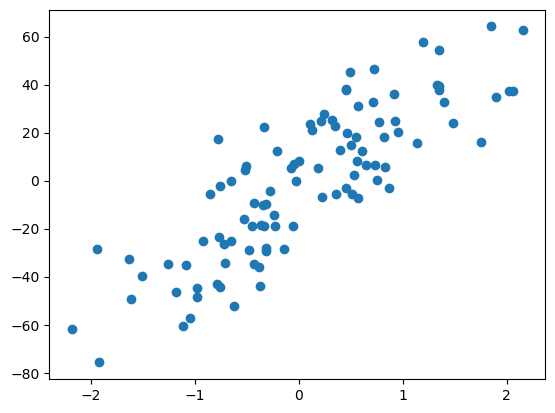

In [3]:
plt.scatter(X, y)

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [9]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.coef_)
print(lr.intercept_)

[28.59868642]
-2.055763594755965


In [10]:
y_pred = lr.predict(X_test)

In [11]:
r2_score(y_test, y_pred)

0.5512358964716794

In [12]:
from sklearn.linear_model import Ridge

In [13]:
rr = Ridge(alpha=10)
rr.fit(X_train, y_train)
print(rr.coef_)
print(rr.intercept_)

[25.26670697]
-1.8392324537238567


In [14]:
y_pred = rr.predict(X_test)

In [15]:
r2_score(y_test, y_pred)

0.5861965224307938

#### Since $0.586$ is greater than $0.551$, the Ridge model is explaining roughly 3.5% more of the variance in the data than the standard Linear Regression model.

In [ ]:
plt.plot(X, y, 'b.')
plt.plot(X, lr.predict(X_test), color = 'red', label='alpha=0')


In [17]:
rr1 = Ridge(alpha=100)
rr1.fit(X_train, y_train)
print(rr1.coef_)
print(rr1.intercept_)

[12.33380747]
-0.9987784450748569


In [18]:
r2_score(y_test, rr1.predict(X_test))

0.4705552982469957

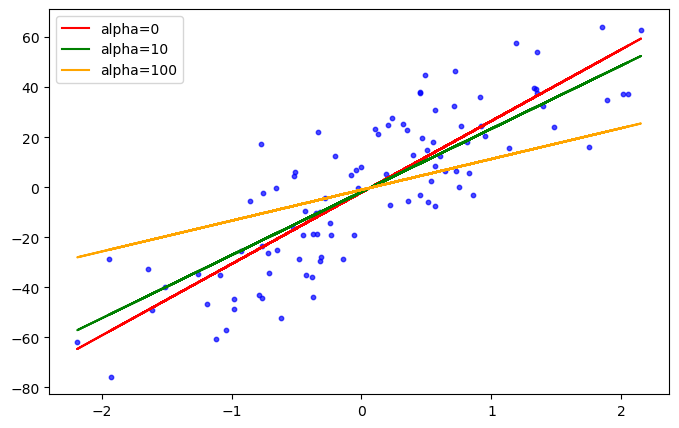

In [20]:
# 1. Plot the actual data points
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', s=10, marker='o', alpha=0.7) # Purple-ish blue dots

# 2. Plot the model predictions across the original X
# Using the models you already fitted (lr, rr, rr1)
plt.plot(X, lr.predict(X), color='red', label='alpha=0')
plt.plot(X, rr.predict(X), color='green', label='alpha=10')
plt.plot(X, rr1.predict(X), color='orange', label='alpha=100')

# 3. Add the legend and labels
plt.legend()
plt.show()

#### As the alpha increases, the model's line becomes flatter and less sensitive to the individual data points.
#### However, more alpha(100) may cause underfitting.

## From scratch

In [22]:
class MyRidge:
    
    def __init__(self,alpha=0.1):
        self.alpha = alpha
        self.m = None
        self.b = None
        
    def fit(self,X_train,y_train):
        
        num = 0
        den = 0
        
        for i in range(X_train.shape[0]):
            num = num + (y_train[i] - y_train.mean())*(X_train[i] - X_train.mean())
            den = den + (X_train[i] - X_train.mean())*(X_train[i] - X_train.mean())
        
        self.m = num/(den + self.alpha)
        self.b = y_train.mean() - (self.m*X_train.mean())
        print(self.m,self.b)
    
    def predict(X_test):
        pass

In [23]:
reg = MyRidge(alpha=100)

In [24]:
reg.fit(X_test, y_test)

[2.22372077] [-2.62923242]


# Ridge regression for gradient descent

In [25]:
model = Ridge(alpha=0.001, max_iter=500, solver='sparse_cg')

In [26]:
model.fit(X_test, y_test)

Ridge(alpha=0.001, max_iter=500, solver='sparse_cg')

In [27]:
y_pred = model.predict(X_test)
print("R2 score:", r2_score(y_pred, y_test))
print(model.coef_)
print(model.intercept_)

R2 score: 0.3353326856845824
[22.44309769]
-3.2781532381830085
